In [813]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math
import warnings
warnings.simplefilter("ignore")

In [814]:
df = pd.read_csv("marketing_campaign.csv", sep = "\t")

In [815]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [816]:
df = df.drop("ID", axis = 1)

In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

### Preprocessing

*** Year_Birth sütununda yaş elde edeceğiz ancak işlem tarihini data nın paylaşıldığı yıl (2021) olarak kabul etmenin daha doğru olacağını düşünüyorum.
Benzeri tüm durumlar için güncel tarihi 2021 olarak hesaba katacağız.

In [820]:
df["Age"] = 2021-df["Year_Birth"]

In [821]:
df = df.drop("Year_Birth",axis = 1)

boş değer var mı bakalım:

In [823]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

In [824]:
df = df.dropna()

In [825]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Aykırı değerler var mı diye tespit etmek için, sayısal sütunların en büyük 5, en küçük 5 ve ortalama değerlerine bakalım:

In [827]:
df_int=df.select_dtypes(include=['number'])
for col in df_int.columns:
    max_5 = df_int.sort_values(col, ascending=False).head(5)[col]
    min_5 = df_int.sort_values(col, ascending=True).head(5)[col]
    mean = df_int[col].mean()
    print(f"{col.upper()}:\nlargest_5:\n{max_5.tolist()}\nmean:{mean}\nshort_5:\n{min_5.tolist()}\n")
 
    

INCOME:
largest_5:
[666666.0, 162397.0, 160803.0, 157733.0, 157243.0]
mean:52247.25135379061
short_5:
[1730.0, 2447.0, 3502.0, 4023.0, 4428.0]

KIDHOME:
largest_5:
[2, 2, 2, 2, 2]
mean:0.4417870036101083
short_5:
[0, 0, 0, 0, 0]

TEENHOME:
largest_5:
[2, 2, 2, 2, 2]
mean:0.5054151624548736
short_5:
[0, 0, 0, 0, 0]

RECENCY:
largest_5:
[99, 99, 99, 99, 99]
mean:49.01263537906137
short_5:
[0, 0, 0, 0, 0]

MNTWINES:
largest_5:
[1493, 1492, 1492, 1486, 1478]
mean:305.09160649819495
short_5:
[0, 0, 0, 0, 0]

MNTFRUITS:
largest_5:
[199, 199, 197, 194, 194]
mean:26.356046931407942
short_5:
[0, 0, 0, 0, 0]

MNTMEATPRODUCTS:
largest_5:
[1725, 1725, 1622, 1582, 984]
mean:166.99593862815885
short_5:
[0, 1, 1, 1, 1]

MNTFISHPRODUCTS:
largest_5:
[259, 258, 258, 258, 254]
mean:37.63763537906137
short_5:
[0, 0, 0, 0, 0]

MNTSWEETPRODUCTS:
largest_5:
[262, 198, 197, 196, 195]
mean:27.028880866425993
short_5:
[0, 0, 0, 0, 0]

MNTGOLDPRODS:
largest_5:
[321, 291, 262, 249, 248]
mean:43.96525270758123
sho

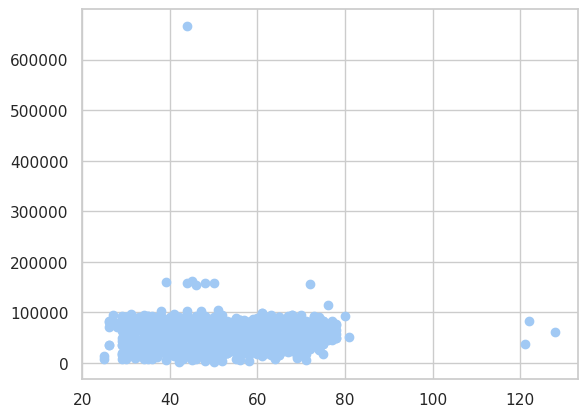

In [828]:
plt.scatter(df["Age"],df["Income"])

In [829]:
print("row count: ",len(df))

row count:  2216


In [830]:
df = df[df["Age"]<90]

In [831]:
df = df[df["Income"]<400000]

In [832]:
print("row count: ",len(df))

row count:  2212


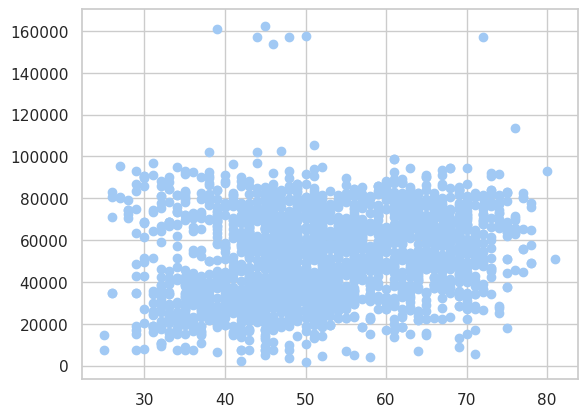

In [833]:
plt.scatter(df["Age"],df["Income"])

sütunların kaç farklı değer aldığına bakalım:

In [835]:
for col in df.columns:
  print(col,"->", df[col].nunique())

Education -> 5
Marital_Status -> 8
Income -> 1970
Kidhome -> 3
Teenhome -> 3
Dt_Customer -> 662
Recency -> 100
MntWines -> 775
MntFruits -> 158
MntMeatProducts -> 553
MntFishProducts -> 182
MntSweetProducts -> 176
MntGoldProds -> 212
NumDealsPurchases -> 15
NumWebPurchases -> 15
NumCatalogPurchases -> 14
NumStorePurchases -> 14
NumWebVisitsMonth -> 16
AcceptedCmp3 -> 2
AcceptedCmp4 -> 2
AcceptedCmp5 -> 2
AcceptedCmp1 -> 2
AcceptedCmp2 -> 2
Complain -> 2
Z_CostContact -> 1
Z_Revenue -> 1
Response -> 2
Age -> 56


In [836]:
droped = ["Z_CostContact", "Z_Revenue"]
df = df.drop(droped, axis = 1)

In [837]:
#burdan sonra yapacağımız feature engineering işlemlkerine kopya bir dataframe de devam edelim:
copy_df=df.copy()

Promotion ile ilgili sütunları bir araya getirip neler yapabileceğimii kontrol edelim:

In [839]:
colmn = ["NumDealsPurchases","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
i = []
for col in colmn:
    i.append(copy_df.columns.get_loc(col))
print(i)
promotion_df = copy_df.iloc[:,i]
promotion_df

[13, 21, 22, 18, 19, 20, 24]


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0
2236,7,1,0,0,0,0,0
2237,1,0,0,0,1,0,0
2238,2,0,0,0,0,0,0


Müşterinin kabul ettiği toplam kampanya sayısını bulalım:

In [841]:
result = promotion_df.drop(["NumDealsPurchases"], axis = 1)
result['ones_count'] = result.sum(axis=1)
CampaingCount = result["ones_count"]

In [842]:
result["ones_count"][0:20]

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
11    0
12    0
13    0
14    0
15    3
16    0
17    0
18    1
19    0
20    0
Name: ones_count, dtype: int64

In [843]:
copy_df["CampaingCount"] = CampaingCount
del_colmn = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
copy_df = copy_df.drop(del_colmn, axis = 1)

object türündeki sutunları basitleştirelim:

In [845]:
# Medeni halkını yanlız olma durumunu ifad edenleri "0" birlikteliği olma durumunu "1" ile temsil edecek şekilde düzenleme:
copy_df["Marital_Status"] = copy_df["Marital_Status"].replace(
    {"Married":1, "Together":1, 
     "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0})
# eğitim durumunu lisans seviyesinden düşük olanları "0" ve lisans ve üstü olanlaı "1" olacak şekilde düzenleme:
copy_df["Education"] = copy_df["Education"].replace(
    {"Basic":0,"2n Cycle":0, 
     "Graduation":1, 
     "Master":1, 
     "PhD":1})
# *** bu işlemi label encoding ile de yapabilirdik ama önce string bir ifade ile temsil ettirip sonra encoding yapmayı gereksiz buldum.
copy_df["Marital_Status"].astype(int)
copy_df["Education"].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    1
2238    1
2239    1
Name: Education, Length: 2212, dtype: int32

In [846]:
final_day = pd.to_datetime('2021-01-01')
copy_df['Customer_Years'] = (final_day - pd.to_datetime(copy_df['Dt_Customer'], format='%d-%m-%Y')).dt.days / 365

# Artık ihtiyaç duyulmayan 'Dt_Customer' sütununu kaldırıyoruz.
copy_df.drop('Dt_Customer', axis=1, inplace=True)

Hane halkı sayısı ile ilgili düzenlemeler yapalım:

In [848]:
# evdeki toplam kişi sayısını bulmak için ilgili sütunları topluyoruz ve +1 kendisini ekliyoruz.
copy_df["Livinghome"] = copy_df["Marital_Status"] + copy_df["Kidhome"] + copy_df["Teenhome"] + 1
copy_df["Livinghome"] 

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Livinghome, Length: 2212, dtype: int64

In [849]:
droped = ["Marital_Status", "Teenhome","Kidhome"]
copy_df=copy_df.drop(droped, axis = 1)


toplam harcamalar ile ilgili bir sütun işimize yarayacaktır.

In [851]:
copy_df["TotalSpent"] = copy_df["MntWines"] + copy_df["MntFruits"] + copy_df["MntMeatProducts"] + copy_df["MntFishProducts"] + copy_df["MntSweetProducts"] + copy_df["MntGoldProds"]


son hali bir kontrol edelim:

In [853]:
    copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Recency              2212 non-null   int64  
 3   MntWines             2212 non-null   int64  
 4   MntFruits            2212 non-null   int64  
 5   MntMeatProducts      2212 non-null   int64  
 6   MntFishProducts      2212 non-null   int64  
 7   MntSweetProducts     2212 non-null   int64  
 8   MntGoldProds         2212 non-null   int64  
 9   NumDealsPurchases    2212 non-null   int64  
 10  NumWebPurchases      2212 non-null   int64  
 11  NumCatalogPurchases  2212 non-null   int64  
 12  NumStorePurchases    2212 non-null   int64  
 13  NumWebVisitsMonth    2212 non-null   int64  
 14  Complain             2212 non-null   int64  
 15  Age                  2212 non-null   int64 

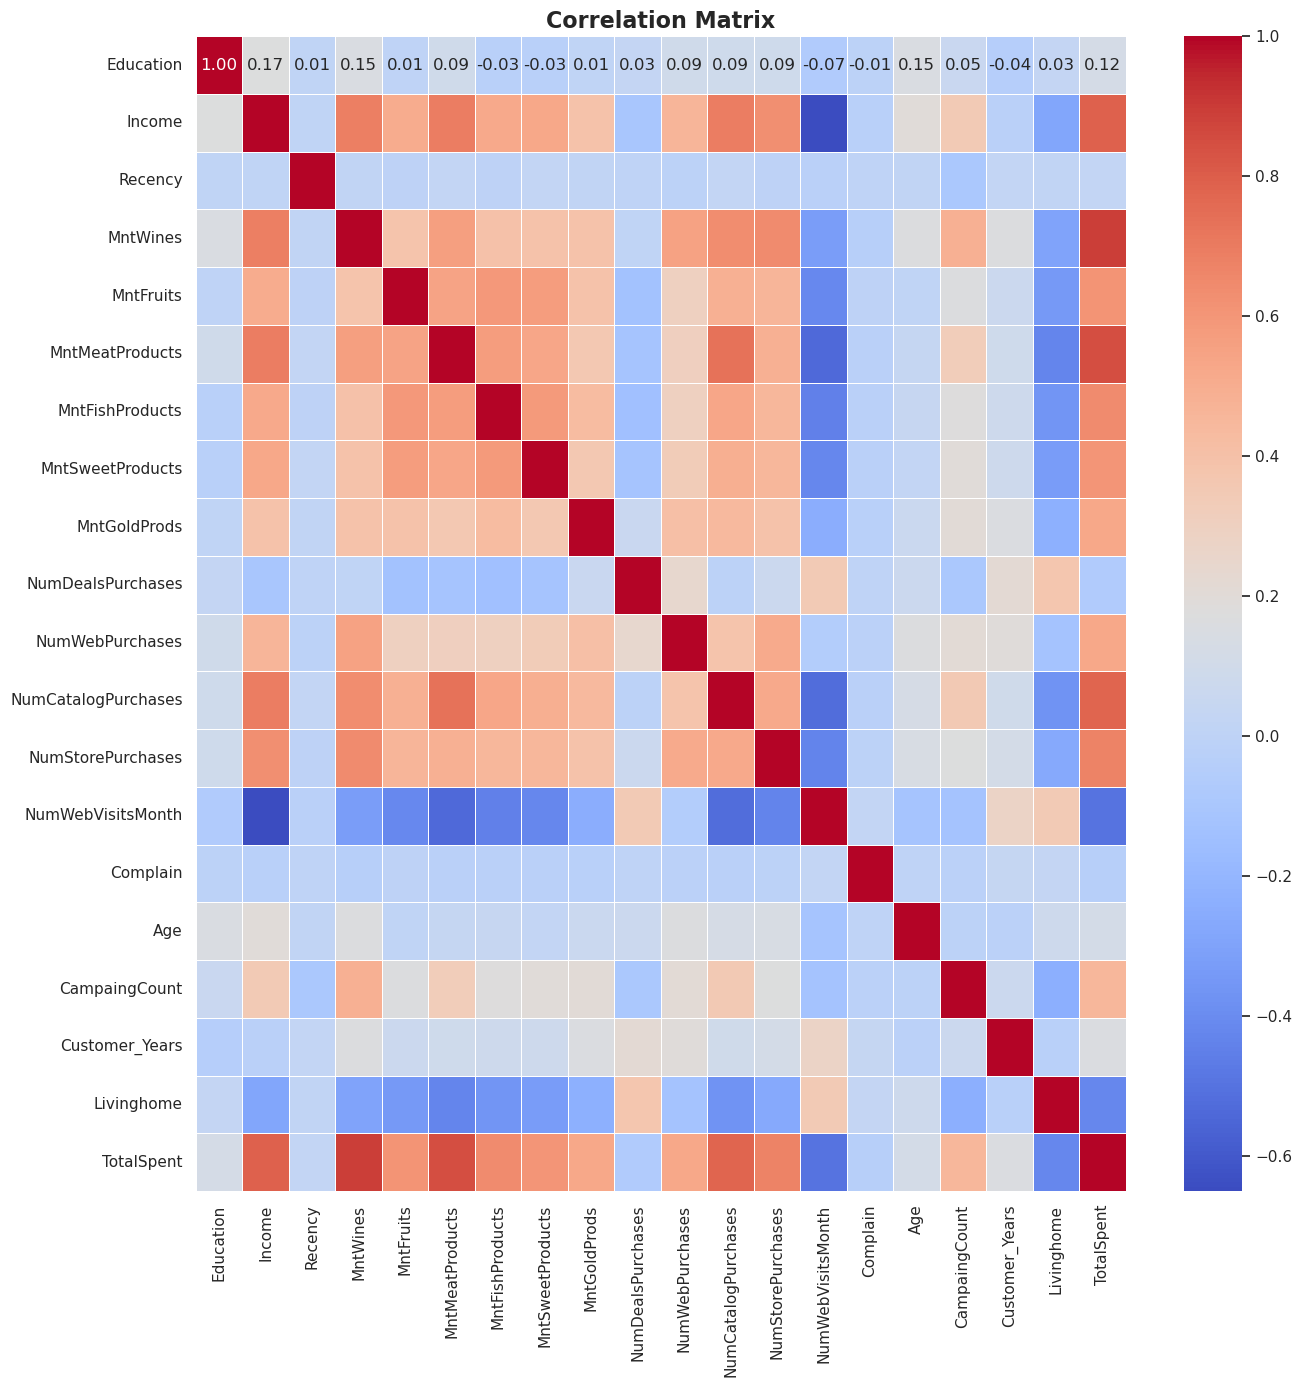

In [854]:
corrmat = copy_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(
    corrmat,
    annot=True,
    fmt=".2f", 
    cmap="coolwarm",
    linewidths=0.5
)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

In [855]:
copy_df.describe()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,CampaingCount,Customer_Years,Livinghome,TotalSpent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.886076,51958.810579,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.009042,52.086347,0.448915,7.484149,2.593128,607.268083
std,0.317791,21527.278844,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.094678,11.701599,0.893017,0.554781,0.906236,602.513364
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,6.515068,1.000000,5.000000
25%,1.000000,35233.500000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,44.000000,0.000000,7.008219,2.000000,69.000000
50%,1.000000,51371.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,51.000000,0.000000,7.490411,3.000000,397.000000
75%,1.000000,68487.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,62.000000,1.000000,7.964384,3.000000,1048.000000
max,1.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,81.000000,5.000000,8.430137,5.000000,2525.000000


### Scaled:

In [857]:
scaled_df = copy_df.copy()
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df),columns= scaled_df.columns )

In [858]:
scaled_df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,CampaingCount,Customer_Years,Livinghome,TotalSpent
0,0.358569,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.018352,0.617244,1.527721,-1.758359,1.676245
1,0.358569,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,1.274785,-0.502808,-1.189011,0.449070,-0.963297
2,0.358569,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,0.334530,-0.502808,-0.206048,-0.654644,0.280110
3,0.358569,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.289547,-0.502808,-1.060584,0.449070,-0.920135
4,0.358569,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-1.033114,-0.502808,-0.951915,0.449070,-0.307562


### Boyut indirgeme için PCA:

In [860]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
pca_df.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-1.092154e-16,3.212219e-17,-2.007637e-17
std,2.672791e+00,1.377970e+00,1.168915e+00
min,-5.331201e+00,-3.485770e+00,-2.987058e+00
25%,-2.441412e+00,-9.943816e-01,-8.150583e-01
50%,-7.784829e-01,-2.353602e-01,-1.122135e-01
75%,2.246182e+00,8.481370e-01,7.028147e-01
max,7.651937e+00,5.552354e+00,4.357957e+00


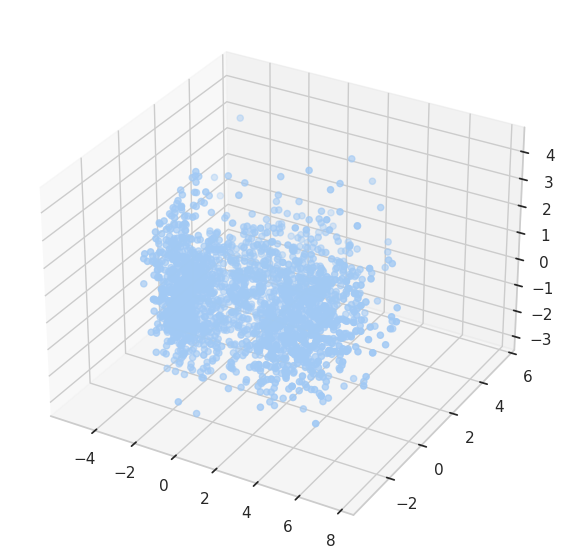

In [861]:
x = pca_df["col1"]
y = pca_df["col2"]
z = pca_df["col3"]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z)
plt.show()

### K-Means Model

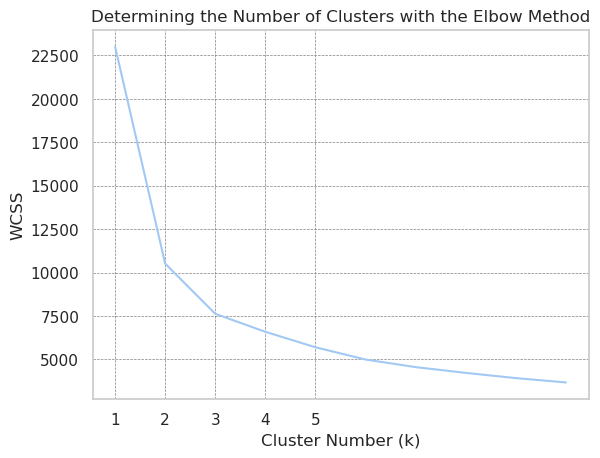

In [863]:
wcss = []
x = [1, 2, 3, 4, 5]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Determining the Number of Clusters with the Elbow Method')
plt.xticks(x)
plt.xlabel('Cluster Number (k)')
plt.ylabel('WCSS')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Grafiğe göre dirsek noktası küme sayısının 3 seçildiği noktada.

In [865]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(pca_df)
pca_df["Cluster"] = y_kmeans
df["Cluster"] = y_kmeans
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Dt_Customer          2212 non-null   object 
 6   Recency              2212 non-null   int64  
 7   MntWines             2212 non-null   int64  
 8   MntFruits            2212 non-null   int64  
 9   MntMeatProducts      2212 non-null   int64  
 10  MntFishProducts      2212 non-null   int64  
 11  MntSweetProducts     2212 non-null   int64  
 12  MntGoldProds         2212 non-null   int64  
 13  NumDealsPurchases    2212 non-null   int64  
 14  NumWebPurchases      2212 non-null   int64  
 15  NumCatalogPurchases  2212 non-null   int64 

### Visualization

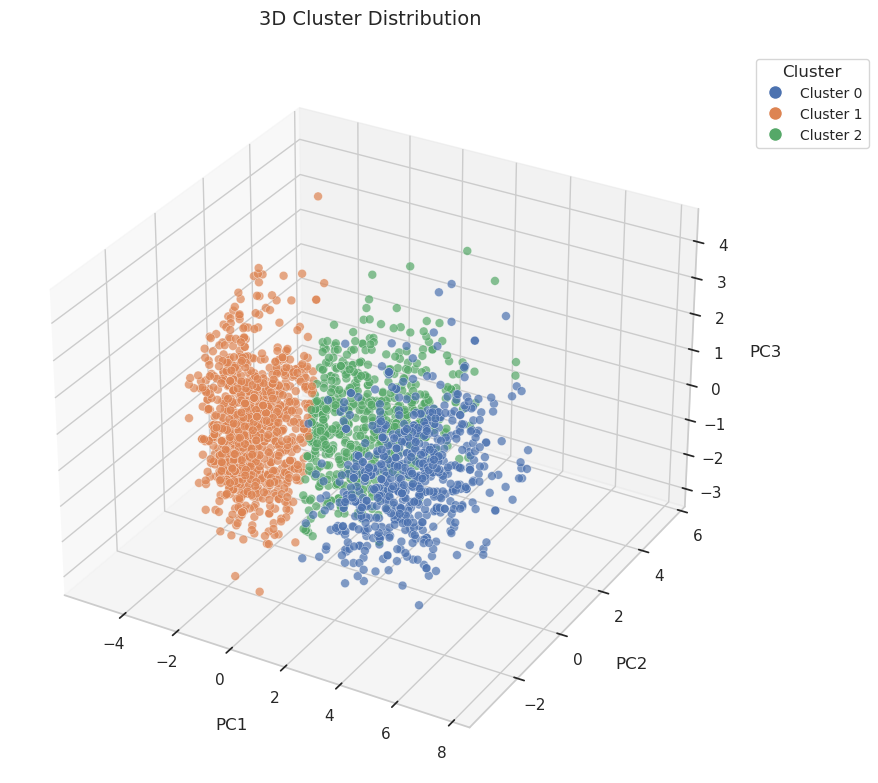

In [867]:
clusters = sorted(pca_df["Cluster"].unique())
palette = sns.color_palette("deep", n_colors=len(clusters))
cluster_colors = {cluster: palette[i] for i, cluster in enumerate(clusters)}
point_colors = [cluster_colors[cluster] for cluster in pca_df["Cluster"]]

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    pca_df["col1"],
    pca_df["col2"],
    pca_df["col3"],
    c=point_colors,
    s=40,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.3
)

# Legend
legend_elements = [plt.Line2D([0], [0], 
                   marker="o", 
                   color="w",
                   markerfacecolor=cluster_colors[cluster],
                   markersize=10,
                   label=f'Cluster {cluster}') 
                  for cluster in clusters]

ax.legend(handles=legend_elements, 
          title="Cluster", 
          bbox_to_anchor=(1.2, 1),
          fontsize=10)

ax.set_xlabel("PC1", fontsize=12, labelpad=12)
ax.set_ylabel("PC2", fontsize=12, labelpad=12)
ax.set_zlabel("PC3", fontsize=12, labelpad=12)
ax.set_title("3D Cluster Distribution", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

kümelerin nasıl dağıldığını anlamaya çalışalım:

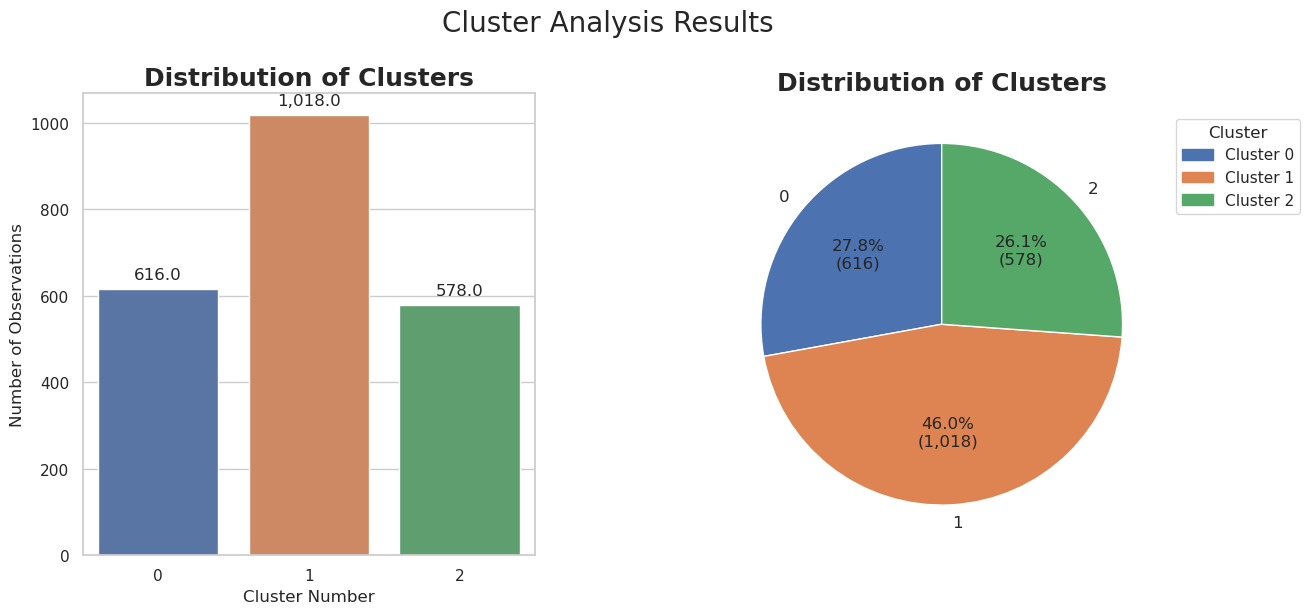

In [869]:


cluster_labels = sorted(df["Cluster"].unique())
palette = sns.color_palette("deep", n_colors=len(cluster_labels)) 
cluster_colors = {label: palette[i] for i, label in enumerate(cluster_labels)}


colors = [cluster_colors[label] for label in cluster_labels]
handles = [mpatches.Patch(color=cluster_colors[label], label=f'Cluster {label}') 
           for label in cluster_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'wspace': 0.4})
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'  # Türkçe karakter desteği

# --- Countplot ---
count_plot = sns.countplot(x=df["Cluster"], order=cluster_labels, palette=colors, ax=axes[0])
axes[0].set(
    xlabel="Cluster Number", 
    ylabel="Number of Observations", 
    title="Distribution of Clusters", 
    ylim=(0, None)
)
axes[0].title.set(size=18, weight="bold")

for bar in count_plot.patches:
    height = bar.get_height()
    count_plot.annotate(
        f'{height:,}',
        (bar.get_x() + bar.get_width()/2, height),
        ha='center', 
        va='bottom', 
        fontsize=12,
        xytext=(0, 5), 
        textcoords='offset points'
    )

# --- Pie Chart ---
cluster_counts = df.groupby("Cluster").size().reindex(cluster_labels)
axes[1].pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*sum(cluster_counts)/100)):,})', 
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    startangle=90,
    textprops={'fontsize': 12}
)
axes[1].set_title("Distribution of Clusters", fontsize=18, fontweight="bold")

fig.suptitle("Cluster Analysis Results", fontsize=20, y=1.02)
fig.legend(handles=handles, title="Cluster", loc='upper right', bbox_to_anchor=(1, 0.85))
plt.tight_layout()

plt.show()

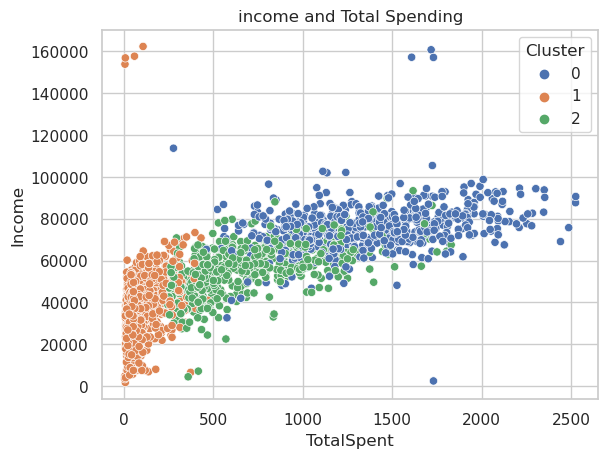

In [870]:
df["TotalSpent"]=copy_df["TotalSpent"]
pl = sns.scatterplot(data = df,x=df["TotalSpent"], y=df["Income"],hue=df["Cluster"], palette =palette)
pl.set_title("income and Total Spending")
fig.legend()
plt.show()

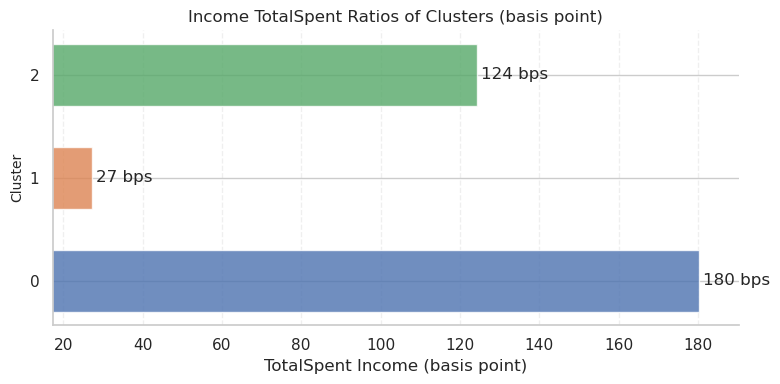

In [871]:
    #Let's calculate how much of the income goes to spending
    df["SpentPercentage"] = (df["TotalSpent"] / df["Income"]) * 100
    #Average Spending Percentages by Cluster
    cluster_sum = df.groupby("Cluster").agg(TotalIncome=("Income", "sum"), TotalSpent=("TotalSpent", "sum"))
    cluster_sum["SpentPercentage"] = (cluster_sum["TotalSpent"] / cluster_sum["TotalIncome"]) * 100
    #cluster_percentage = cluster_sum.reset_index()
    
    cluster_percentage["SpentBPS"] = cluster_percentage["SpentPercentage"] * 100  # 0.3% → 30 bps
    
    plt.figure(figsize=(8, 4))
    bars = plt.barh(
        cluster_percentage["Cluster"].astype(str), 
        cluster_percentage["SpentBPS"], 
        color=palette,
        alpha=0.8,
        height=0.6 
    )
    
    plt.title("Income TotalSpent Ratios of Clusters (basis point)")
    plt.xlabel("TotalSpent Income (basis point)")
    plt.ylabel("Cluster", fontsize=10)
    plt.xlim(min_bps, max_bps) 
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.0f} bps", 
                 va="center")
    
    sns.despine()
    plt.tight_layout()
    plt.show()

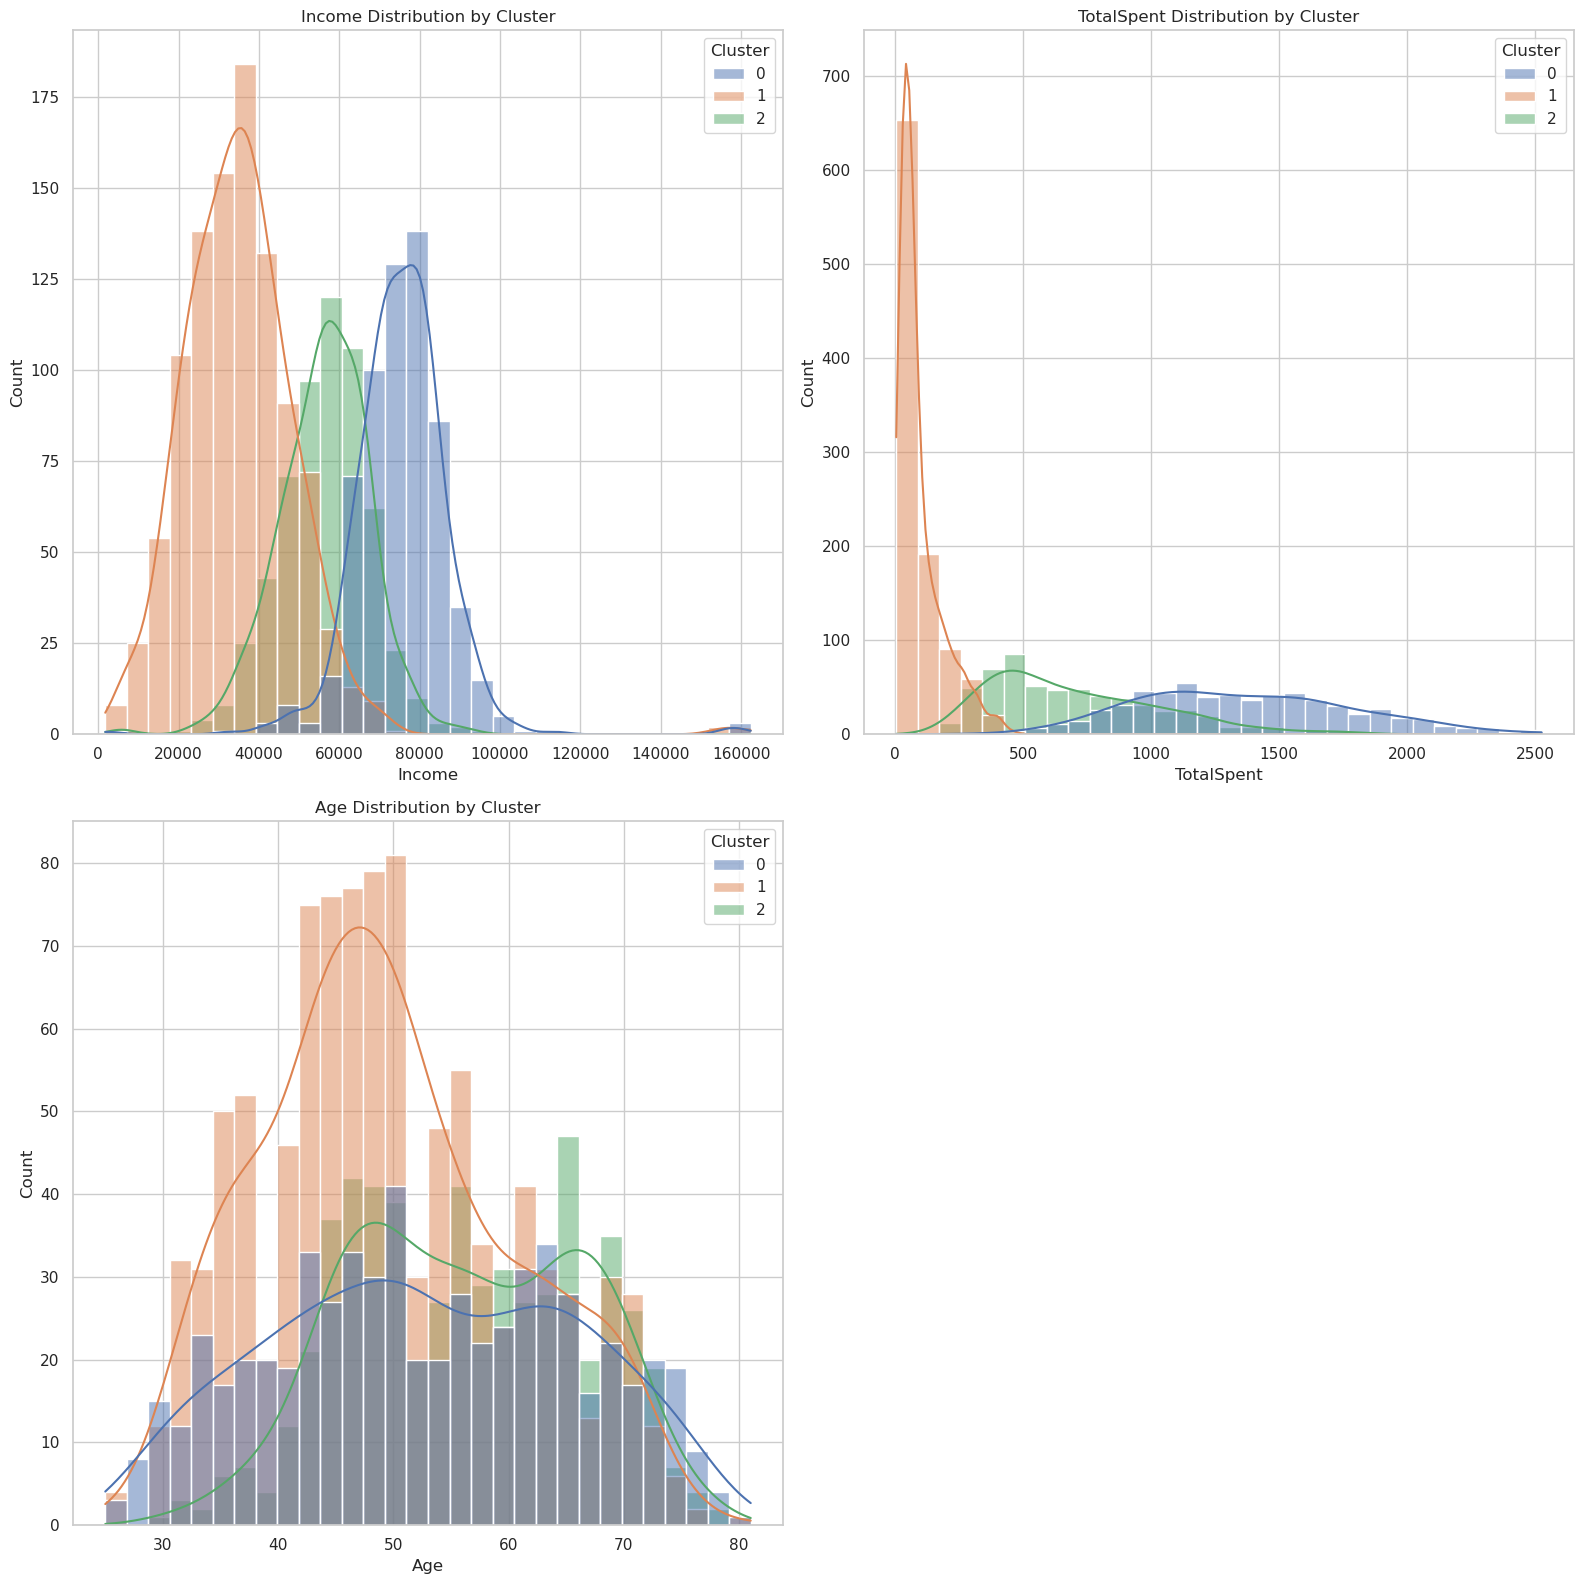

In [872]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(
    data=df,
    x="Income",
    hue="Cluster",
    palette=palette,
    bins=30,
    kde=True,
    ax=axes[0,0]
)
axes[0,0].set_title("Income Distribution by Cluster")

sns.histplot(
    data=df,
    x="TotalSpent",
    hue="Cluster",
    palette=palette,
    bins=30,
    kde=True,
    ax=axes[0,1]
)
axes[0,1].set_title("TotalSpent Distribution by Cluster")
sns.histplot(
    data=df,
    x="Age",
    hue="Cluster",
    palette=palette,
    bins=30,
    kde=True,
    ax=axes[1,0]
)
axes[1,0].set_title("Age Distribution by Cluster")
fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

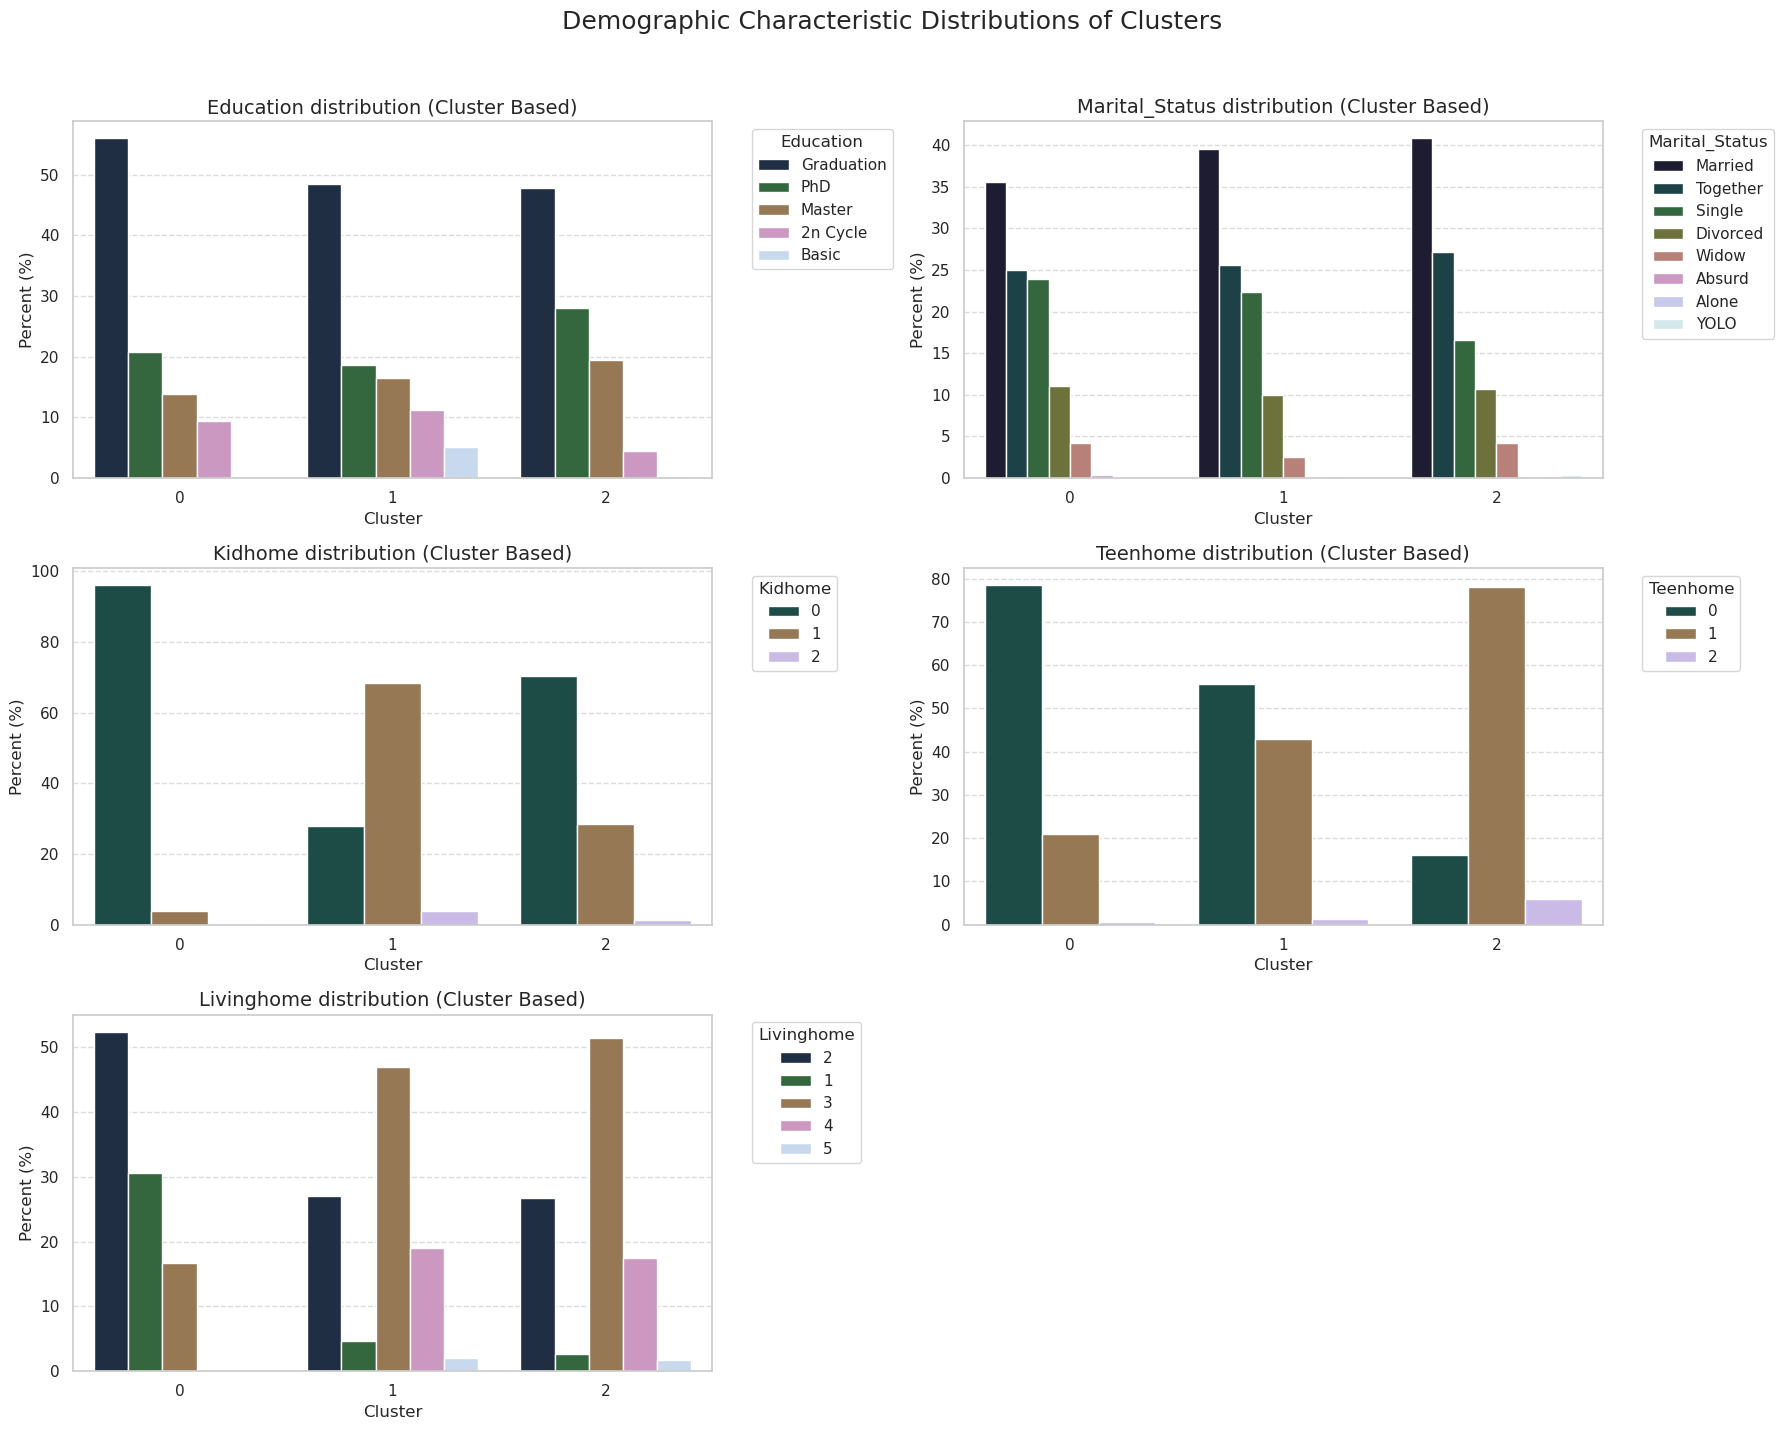

In [873]:
df["Livinghome"]=copy_df["Livinghome"]
features = ["Education", "Marital_Status", "Kidhome", "Teenhome","Livinghome"]

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature in ["Kidhome", "Teenhome","Livinghome"]:
        df[feature] = df[feature].astype(str) 

    cluster_feature_percent = (
        df.groupby("Cluster", observed=True)[feature]
        .value_counts(normalize=True)
        .mul(100)
        .rename("percentage")
        .reset_index()
    )
    
    sns.barplot(
        x="Cluster",
        y="percentage",
        hue=feature,
        data=cluster_feature_percent,
        ax=axes[i],
        palette=sns.color_palette("cubehelix", n_colors=cluster_feature_percent[feature].nunique())
    )
  
    axes[i].set_title(f"{feature} distribution (Cluster Based)", fontsize=14)
    axes[i].set_xlabel("Cluster", fontsize=12)
    axes[i].set_ylabel("Percent (%)", fontsize=12)
    axes[i].legend(title=feature, bbox_to_anchor=(1.05, 1), loc="upper left")
    axes[i].grid(axis='y', linestyle="--", alpha=0.7)
for ax in axes[len(features):]:
    fig.delaxes(ax)
plt.suptitle("Demographic Characteristic Distributions of Clusters", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

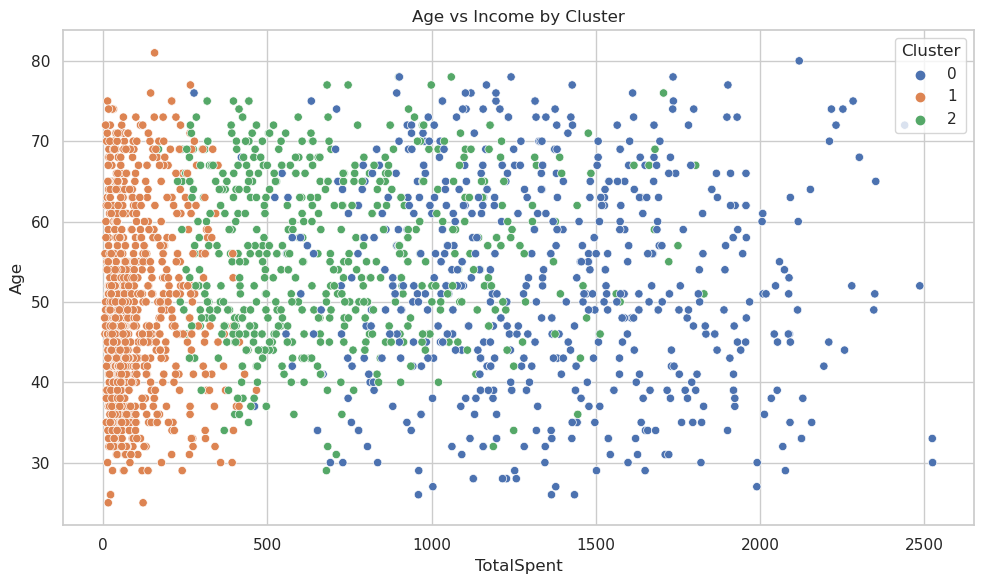

In [874]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="TotalSpent",
    y="Age",
    hue="Cluster",
    palette=palette
)
plt.title("Age vs Income by Cluster")
plt.tight_layout()
plt.show()

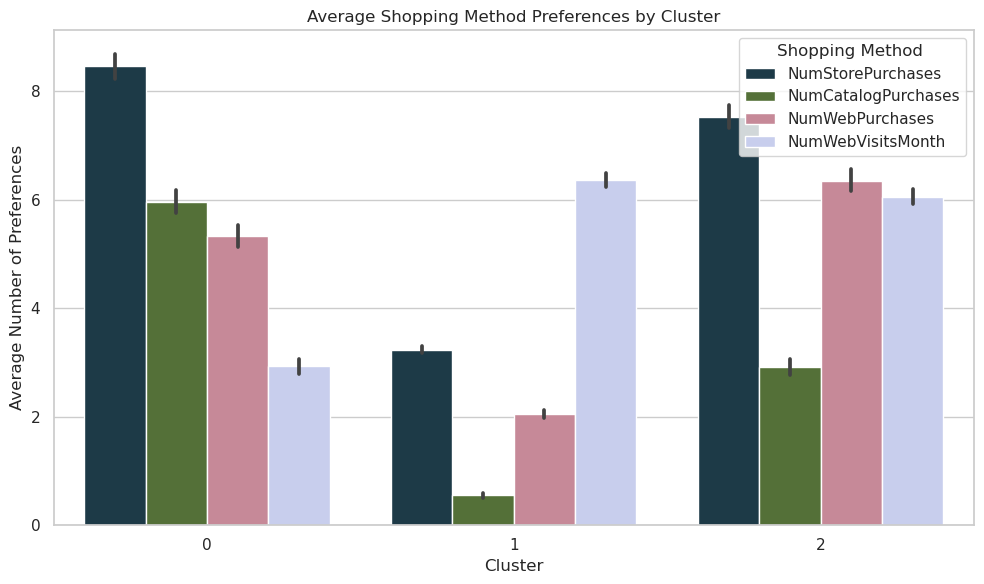

In [875]:


purchase_cols = ["NumStorePurchases", "NumCatalogPurchases", "NumWebPurchases","NumWebVisitsMonth"]

df_melted = pd.melt(df, 
                    id_vars=["Cluster"], 
                    value_vars=purchase_cols, 
                    var_name="PurchaseType", 
                    value_name="Count")

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, 
            x="Cluster", 
            y="Count", 
            hue="PurchaseType", 
            palette="cubehelix",
            estimator=np.mean)
plt.title("Average Shopping Method Preferences by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Number of Preferences")
plt.legend(title="Shopping Method ", loc="upper right")
plt.tight_layout()
plt.show()

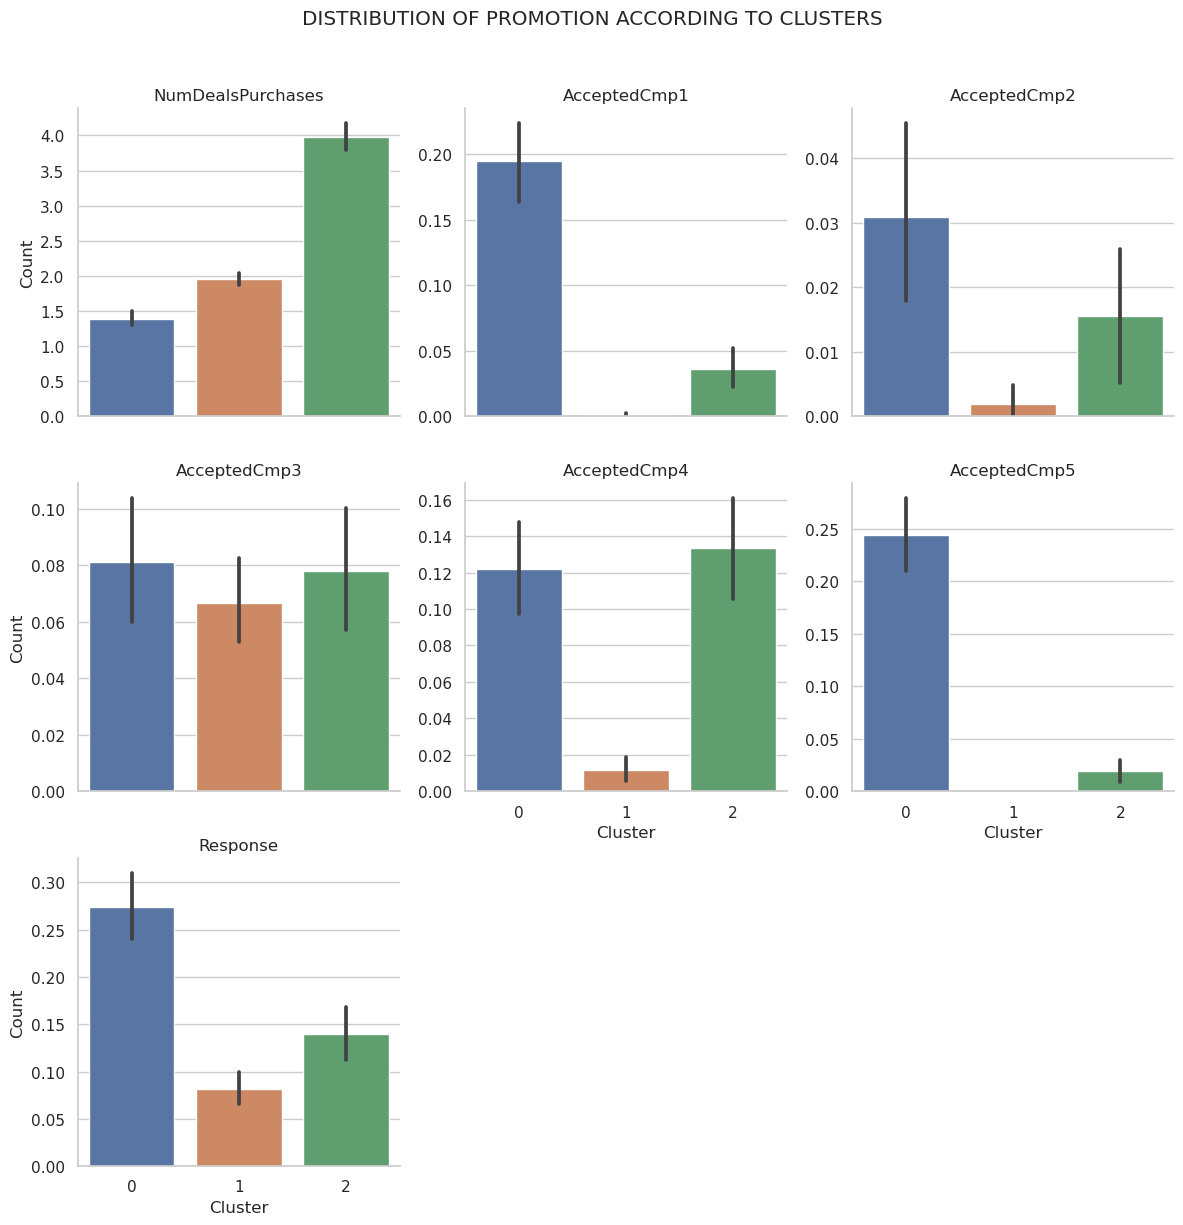

In [876]:
    purchase_cols = ["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
    
    df_melted = pd.melt(df, 
                        id_vars=["Cluster"], 
                        value_vars=purchase_cols, 
                        var_name="PurchaseType", 
                        value_name="Count")
    
    
    
    g = sns.FacetGrid(
        df_melted,
        col="PurchaseType",
        col_wrap=3,
        height=4,
        sharey=False
    )
    g.map(sns.barplot, "Cluster", "Count", estimator=np.mean, palette=palette)
    g.set_titles("{col_name}")
    g.fig.suptitle("DISTRIBUTION OF PROMOTION ACCORDING TO CLUSTERS", y=1.02)
    plt.tight_layout()
    plt.show()

*En çok indirimli alışvedrişi en çok cluster2 tercih ediyor

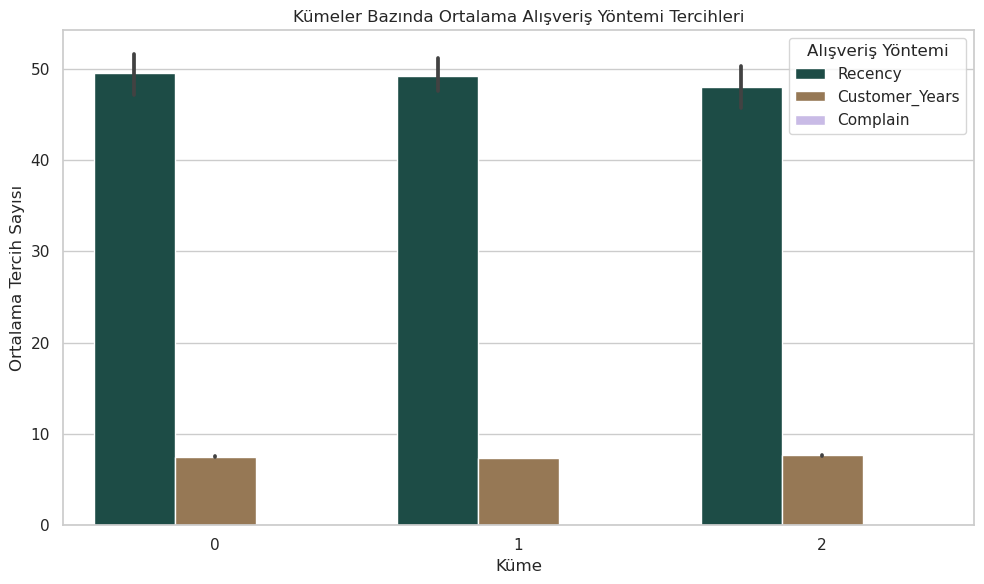

In [879]:
df["Customer_Years"]=copy_df["Customer_Years"]
purchase_cols = ["Recency","Customer_Years","Complain"]
    
df_melted = pd.melt(df, 
                        id_vars=["Cluster"], 
                        value_vars=purchase_cols, 
                        var_name="PurchaseType", 
                        value_name="Count")
    
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, 
                x="Cluster", 
                y="Count", 
                hue="PurchaseType", 
                palette="cubehelix")
plt.title("Kümeler Bazında Ortalama Alışveriş Yöntemi Tercihleri")
plt.xlabel("Küme")
plt.ylabel("Ortalama Tercih Sayısı")
plt.legend(title="Alışveriş Yöntemi", loc="upper right")
plt.tight_layout()
plt.show()

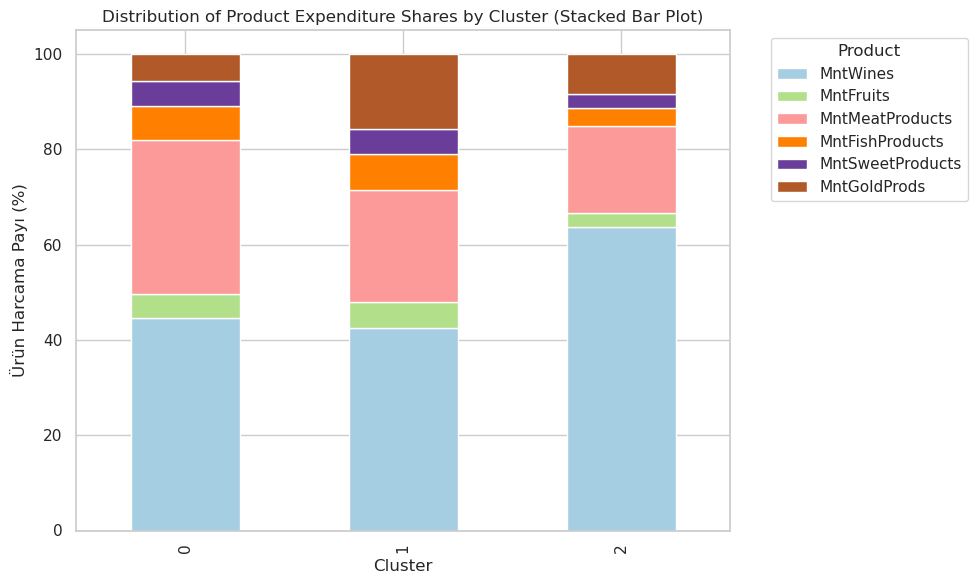

In [883]:

df_stacked.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Paired")
plt.ylabel("Ürün Harcama Payı (%)")
plt.title("Distribution of Product Expenditure Shares by Cluster (Stacked Bar Plot)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

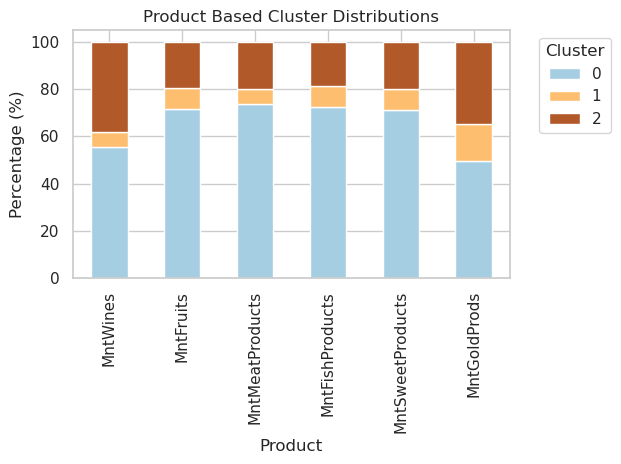

In [885]:

product_cols = [
    "MntWines", "MntFruits", "MntMeatProducts", 
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

cluster_product_sum = df.groupby("Cluster")[product_cols].sum()

product_total = cluster_product_sum.sum(axis=0)

# We calculate the share (%) of each cluster in the total spending of the corresponding product:
cluster_product_perc = cluster_product_sum.divide(product_total, axis=1) * 100
df_product_perc_T = cluster_product_perc.transpose()

plt.figure(figsize=(10,6))
df_product_perc_T.plot(kind="bar", stacked=True, colormap="Paired")
plt.xlabel("Product")
plt.ylabel("Percentage (%)")
plt.title("Product Based Cluster Distributions")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Cluster-0: 
    Yüksek gelir ve harcama seviyesi hem nominal hem de oransal olarak.
    Alışveriş-indirim ilişkisi zayıf.
    Tek başına yaşama durumunun en yoğun karşılaşıldığı küme.
    et harcamalarının kendi harcama oranı içerisindeki payı en yüksek olan grup.
    Tercih ettiği birincil alışveriş yöntemi; mağaza.
Cluater-1:
    Hem en düşük gelire sahip, hemde gelirine oranla en az harcama eyilimi gösteren küme.
    Alışveriş-indirim ilişkisi orta.
    Çocukları genellikle daha küçük(kidhome)
    Gelirine oranla altın harcvamalarının payı diğer kümelere oranla daha yüksek (Tasarruf eğilimi ile açıklanabilir)
    Website ziyaret oranı yüksek
Cluater-2:
    Ortalama gelir ve oransal olarak ortalama harcama düzeyi.
    Alışveriş-indirim ilişkisi en güçlü küme.
    Evdeki genç sayısı oranı yüksek
    Şarap harcalamarının geliri içerisindeki payı en yüksek olan küme
